In [5]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [9]:
DIRECTORY = r'/home/fasal/projects/Github/Classification/dataset'
CATEGORIES = ['cats','dogs']

In [10]:
IMG_SIZE=100

data=[]

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY,category)
    label = CATEGORIES.index(category)
    #print(folder)- this is check wether we are in a specific folder
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        #print(img_path)- check wether image path for each category is selected
        #break
        img_array = cv2.imread(img_path)
        #plt.imshow(img_array)- read and plot the converted image
        #break
        img_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        data.append([img_array,label])

In [11]:
len(data)

2000

In [12]:
random.shuffle(data)

In [13]:
x = []
y = []

for features,label in data:
    x.append(features)
    y.append(label)

In [14]:
x = np.array(x)
y = np.array(y)

In [15]:
len(x)

2000

In [16]:
x=x/255

In [17]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=101)

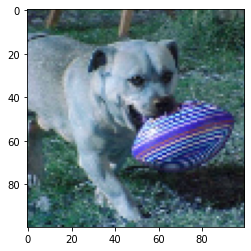

In [18]:
idx = random.randint(0,len(x))
plt.imshow(x[idx, :])

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2023-02-10 14:56:21.841393: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-10 14:56:21.942021: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-10 14:56:21.945211: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/fasal/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-10 14:56:21.945223: I t

In [20]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))


model.add(Flatten())

model.add(Dense(128,input_shape=x.shape[1:],activation='relu'))

model.add(Dense(1,activation='sigmoid'))

2023-02-10 14:56:22.975151: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/fasal/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-10 14:56:22.975176: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-10 14:56:22.975193: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fasal-HP-240-G8-Notebook-PC): /proc/driver/nvidia/version does not exist
2023-02-10 14:56:22.975448: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
#model.fit(x_train,y_train, epochs=5, batch_size=64)

In [ ]:
model.fit(x,y, epochs=20,validation_split=0.2)

Epoch 1/20
50/50 [==============================] - 8s 162ms/step - loss: 0.6960 - accuracy: 0.5069 - val_loss: 0.7005 - val_accuracy: 0.4975
Epoch 2/20
50/50 [==============================] - 8s 159ms/step - loss: 0.6909 - accuracy: 0.5306 - val_loss: 0.6949 - val_accuracy: 0.4975
Epoch 3/20
50/50 [==============================] - 8s 160ms/step - loss: 0.6851 - accuracy: 0.5663 - val_loss: 0.6871 - val_accuracy: 0.5425
Epoch 4/20
50/50 [==============================] - 8s 159ms/step - loss: 0.6641 - accuracy: 0.6000 - val_loss: 0.6898 - val_accuracy: 0.5350
Epoch 5/20
50/50 [==============================] - 8s 164ms/step - loss: 0.6348 - accuracy: 0.6344 - val_loss: 0.6115 - val_accuracy: 0.6675
Epoch 6/20
50/50 [==============================] - 8s 156ms/step - loss: 0.6008 - accuracy: 0.6969 - val_loss: 0.6026 - val_accuracy: 0.6625
Epoch 7/20
50/50 [==============================] - 8s 156ms/step - loss: 0.5617 - accuracy: 0.7113 - val_loss: 0.6175 - val_accuracy: 0.6325
Epoch 

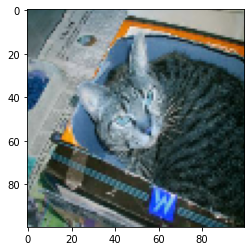

1/1 [==============================] - 0s 159ms/step
[[0.4680086]]
our model says it is a: cat


In [22]:
idx2 = random.randint(0,len(x))
plt.imshow(x[idx2, :])
plt.show()

y_predict = model.predict(x[idx2, :].reshape(1,100,100,3))
print(y_predict)
y_predict = y_predict>0.5

if y_predict==0:
    pred='cat'
else:
    pred='dog'
print('our model says it is a:',pred)